In [38]:
import os
import pandas as pd
from dotenv import load_dotenv
from google.cloud import bigquery
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 100)    # Show all rows

load_dotenv()
query_path = os.environ.get('BASE_QUERY_PATH')
client = bigquery.Client(os.environ.get('BIGQUERY_PROJECT_NAME'))

In [79]:
with open(f"{query_path}/final_blood_inputs_mv.sql", 'r') as file:
    inputs_query = file.read()

inputs = client.query(inputs_query).to_dataframe()
inputs

/home/kmorhun/.pyenv/versions/transfusion/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,subject_id,hadm_id,icustay_id,starttime,endtime,duration_minutes,itemid,rate,rateuom,label,amount,amountuom,totalamount,totalamountuom,statusdescription,cancelreason,orderid,linkorderid
0,22914,132096,266807,2139-03-17 08:00:00,2139-03-17 08:13:00,13,220970,290.000010,mL/hour,Fresh Frozen Plasma,62.833335,ml,290.0,ml,Changed,0,6760876,6760876
1,85535,126156,222517,2197-01-30 07:45:00,2197-01-30 08:45:00,60,220970,292.999992,mL/hour,Fresh Frozen Plasma,292.999992,ml,293.0,ml,Rewritten,0,8158806,8158806
2,77013,141363,262256,2191-04-11 11:43:00,2191-04-11 12:00:00,17,220970,301.000014,mL/hour,Fresh Frozen Plasma,85.283337,ml,301.0,ml,Changed,0,6971691,6971691
3,67938,179620,219955,2130-03-30 06:49:00,2130-03-30 07:49:00,60,220970,271.999998,mL/hour,Fresh Frozen Plasma,271.999998,ml,272.0,ml,FinishedRunning,0,457069,457069
4,46935,156099,270704,2197-03-04 13:57:00,2197-03-04 14:57:00,60,220970,273.000012,mL/hour,Fresh Frozen Plasma,273.000012,ml,273.0,ml,FinishedRunning,0,6538589,6538589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38579,55272,156180,230768,2159-12-17 14:12:00,2159-12-17 14:57:00,45,225168,499.999980,mL/hour,Packed Red Blood Cells,374.999985,ml,375.0,ml,Rewritten,2,8718915,8718915
38580,29035,119860,235102,2155-03-12 03:45:00,2155-03-12 04:22:00,37,225168,1023.243240,mL/hour,Packed Red Blood Cells,630.999998,ml,631.0,ml,Rewritten,2,3946645,3946645
38581,53626,155583,266835,2120-02-09 10:39:00,2120-02-09 11:01:00,22,225168,1022.727240,mL/hour,Packed Red Blood Cells,374.999988,ml,375.0,ml,Rewritten,2,6577686,6577686
38582,82322,140140,237924,2189-06-30 10:50:00,2189-06-30 11:11:00,21,225168,999.999960,mL/hour,Packed Red Blood Cells,349.999986,ml,350.0,ml,Rewritten,2,138817,138817


In [74]:
#Theory based on https://github.com/MIT-LCP/mimic-code/issues/47: statusdescription = Rewritten are input events that were never administered to the patient

administered_inputs = inputs[inputs.statusdescription != "Rewritten"]
administered_inputs["duration"] = administered_inputs["starttime"].astype(str)+","+administered_inputs["endtime"].astype(str)
administered_inputs.groupby("linkorderid")[["starttime","endtime", "duration"]].agg(["min","max"])
# administered_inputs.groupby("linkorderid").agg(["min","max"])[7465413]



/tmp/ipykernel_1940/736980648.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  administered_inputs["duration"] = administered_inputs["starttime"].astype(str)+","+administered_inputs["endtime"].astype(str)


starttime                                 endtime  \
                            min                 max                 min   
linkorderid                                                               
63          2144-12-04 00:07:00 2144-12-04 00:07:00 2144-12-04 02:37:00   
113         2192-02-11 20:10:00 2192-02-11 20:10:00 2192-02-11 22:10:00   
265         2137-10-21 17:29:00 2137-10-21 17:29:00 2137-10-21 19:29:00   
293         2136-05-01 13:50:00 2136-05-01 13:50:00 2136-05-01 16:50:00   
401         2153-09-20 03:15:00 2153-09-20 03:15:00 2153-09-20 04:34:00   
...                         ...                 ...                 ...   
9999167     2153-08-15 21:16:00 2153-08-15 21:16:00 2153-08-15 22:16:00   
9999211     2143-12-22 07:30:00 2143-12-22 07:30:00 2143-12-22 08:30:00   
9999474     2198-05-31 02:55:00 2198-05-31 02:55:00 2198-05-31 03:11:00   
9999629     2130-12-26 05:27:00 2130-12-26 05:27:00 2130-12-26 06:27:00   
9999950     2124-09-12 09:20:00 2124-09-12 09:20:00 2124-09-12 11:20:00   

                                                                duration  \
                            max                                      min   
linkorderid                                                                
63          2144-12-04 02:37:00  2144-12-04 00:07:00,2144-12-04 02:37:00   
113         2192-02-11 22:10:00  2192-02-11 20:10:00,2192-02-11 22:10:00   
265         2137-10-21 19:29:00  2137-10-21 17:29:00,2137-10-21 19:29:00   
293         2136-05-01 16:50:00  2136-05-01 13:50:00,2136-05-01 16:50:00   
401         2153-09-20 04:34:00  2153-09-20 03:15:00,2153-09-20 04:34:00   
...                         ...                                      ...   
9999167     2153-08-15 22:16:00  2153-08-15 21:16:00,2153-08-15 22:16:00   
9999211     2143-12-22 08:30:00  2143-12-22 07:30:00,2143-12-22 08:30:00   
9999474     2198-05-31 03:11:00  2198-05-31 02:55:00,2198-05-31 03:11:00   
9999629     2130-12-26 06:27:00  2130-12-26 05:27:00,2130-12-26 06:27:00   
9999950     2124-09-12 11:20:00  2124-09-12 09:20:00,2124-09-12 11:20:00   

                                                      
                                                 max  
linkorderid                                           
63           2144-12-04 00:07:00,2144-12-04 02:37:00  
113          2192-02-11 20:10:00,2192-02-11 22:10:00  
265          2137-10-21 17:29:00,2137-10-21 19:29:00  
293          2136-05-01 13:50:00,2136-05-01 16:50:00  
401          2153-09-20 03:15:00,2153-09-20 04:34:00  
...                                              ...  
9999167      2153-08-15 21:16:00,2153-08-15 22:16:00  
9999211      2143-12-22 07:30:00,2143-12-22 08:30:00  
9999474      2198-05-31 02:55:00,2198-05-31 03:11:00  
9999629      2130-12-26 05:27:00,2130-12-26 06:27:00  
9999950      2124-09-12 09:20:00,2124-09-12 11:20:00  

[32818 rows x 6 columns]

In [75]:
#sanity check - are the time segments contiguous? yes!
administered_inputs[administered_inputs.linkorderid == 7465413]

,subject_id,hadm_id,icustay_id,starttime,endtime,duration_minutes,itemid,rate,rateuom,label,amount,amountuom,totalamount,totalamountuom,statusdescription,cancelreason,orderid,linkorderid,duration
5940,87275,117310,249863,2107-05-24 09:40:00,2107-05-24 09:54:00,14,225168,100.253808,mL/hour,Packed Red Blood Cells,23.392555,ml,350.0,ml,Changed,0,2600968,7465413,"2107-05-24 09:40:00,2107-05-24 09:54:00"
6348,87275,117310,249863,2107-05-24 11:50:00,2107-05-24 12:41:00,51,225168,149.034420,mL/hour,Packed Red Blood Cells,126.679257,ml,350.0,ml,FinishedRunning,0,2756561,7465413,"2107-05-24 11:50:00,2107-05-24 12:41:00"
9160,87275,117310,249863,2107-05-24 10:37:00,2107-05-24 11:50:00,73,225168,100.009938,mL/hour,Packed Red Blood Cells,121.678758,ml,350.0,ml,Changed,0,3480179,7465413,"2107-05-24 10:37:00,2107-05-24 11:50:00"
10320,87275,117310,249863,2107-05-24 09:54:00,2107-05-24 10:37:00,43,225168,80.115480,mL/hour,Packed Red Blood Cells,57.416094,ml,350.0,ml,Changed,0,1093353,7465413,"2107-05-24 09:54:00,2107-05-24 10:37:00"
20416,87275,117310,249863,2107-05-24 09:30:00,2107-05-24 09:40:00,10,225168,124.999998,mL/hour,Packed Red Blood Cells,20.833333,ml,350.0,ml,Changed,0,7465413,7465413,"2107-05-24 09:30:00,2107-05-24 09:40:00"


In [76]:
timepairsbyid = administered_inputs.groupby("linkorderid").apply(lambda elts : (elts.starttime, elts.endtime))
timepairsbyid

/tmp/ipykernel_1940/1134024433.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  timepairsbyid = administered_inputs.groupby("linkorderid").apply(lambda elts : (elts.starttime, elts.endtime))


linkorderid
63         ([2144-12-04 00:07:00], [2144-12-04 02:37:00])
113        ([2192-02-11 20:10:00], [2192-02-11 22:10:00])
265        ([2137-10-21 17:29:00], [2137-10-21 19:29:00])
293        ([2136-05-01 13:50:00], [2136-05-01 16:50:00])
401        ([2153-09-20 03:15:00], [2153-09-20 04:34:00])
                                ...                      
9999167    ([2153-08-15 21:16:00], [2153-08-15 22:16:00])
9999211    ([2143-12-22 07:30:00], [2143-12-22 08:30:00])
9999474    ([2198-05-31 02:55:00], [2198-05-31 03:11:00])
9999629    ([2130-12-26 05:27:00], [2130-12-26 06:27:00])
9999950    ([2124-09-12 09:20:00], [2124-09-12 11:20:00])
Length: 32818, dtype: object

In [77]:
administered_inputs.linkorderid.value_counts()

linkorderid
7465413    5
65058      4
198917     4
7010605    3
2472794    3
          ..
5605558    1
9558980    1
5238790    1
2730189    1
8412011    1
Name: count, Length: 32818, dtype: Int64

In [115]:
administered_inputs[administered_inputs.duration_minutes > 5000].linkorderid.value_counts()

Series([], Name: count, dtype: Int64)

In [ ]:
with open(f"{query_path}/final_blood_inputs_mv.sql", 'r') as file:
    inputs_query = file.read()

inputs = client.query(inputs_query).to_dataframe()
inputs

/home/kmorhun/.pyenv/versions/transfusion/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,subject_id,hadm_id,icustay_id,starttime,endtime,duration_minutes,itemid,rate,rateuom,label,amount,amountuom,totalamount,totalamountuom,statusdescription,cancelreason,orderid,linkorderid
0,22914,132096,266807,2139-03-17 08:00:00,2139-03-17 08:13:00,13,220970,290.000010,mL/hour,Fresh Frozen Plasma,62.833335,ml,290.0,ml,Changed,0,6760876,6760876
1,85535,126156,222517,2197-01-30 07:45:00,2197-01-30 08:45:00,60,220970,292.999992,mL/hour,Fresh Frozen Plasma,292.999992,ml,293.0,ml,Rewritten,0,8158806,8158806
2,77013,141363,262256,2191-04-11 11:43:00,2191-04-11 12:00:00,17,220970,301.000014,mL/hour,Fresh Frozen Plasma,85.283337,ml,301.0,ml,Changed,0,6971691,6971691
3,67938,179620,219955,2130-03-30 06:49:00,2130-03-30 07:49:00,60,220970,271.999998,mL/hour,Fresh Frozen Plasma,271.999998,ml,272.0,ml,FinishedRunning,0,457069,457069
4,46935,156099,270704,2197-03-04 13:57:00,2197-03-04 14:57:00,60,220970,273.000012,mL/hour,Fresh Frozen Plasma,273.000012,ml,273.0,ml,FinishedRunning,0,6538589,6538589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38579,55272,156180,230768,2159-12-17 14:12:00,2159-12-17 14:57:00,45,225168,499.999980,mL/hour,Packed Red Blood Cells,374.999985,ml,375.0,ml,Rewritten,2,8718915,8718915
38580,29035,119860,235102,2155-03-12 03:45:00,2155-03-12 04:22:00,37,225168,1023.243240,mL/hour,Packed Red Blood Cells,630.999998,ml,631.0,ml,Rewritten,2,3946645,3946645
38581,53626,155583,266835,2120-02-09 10:39:00,2120-02-09 11:01:00,22,225168,1022.727240,mL/hour,Packed Red Blood Cells,374.999988,ml,375.0,ml,Rewritten,2,6577686,6577686
38582,82322,140140,237924,2189-06-30 10:50:00,2189-06-30 11:11:00,21,225168,999.999960,mL/hour,Packed Red Blood Cells,349.999986,ml,350.0,ml,Rewritten,2,138817,138817


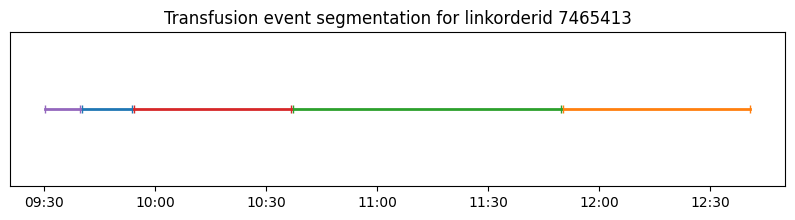

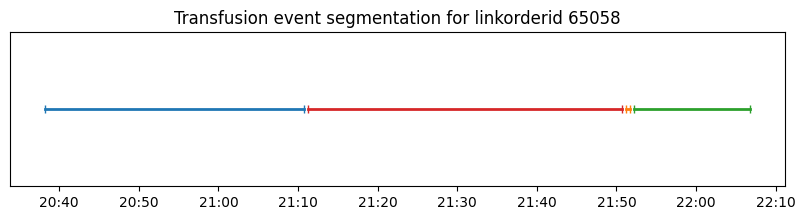

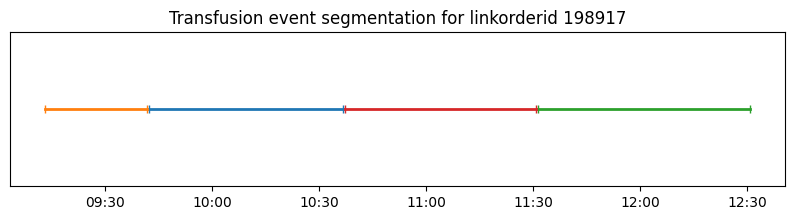

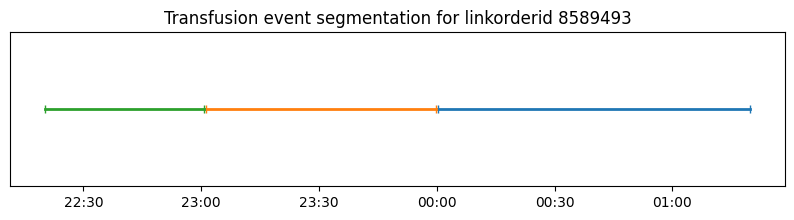

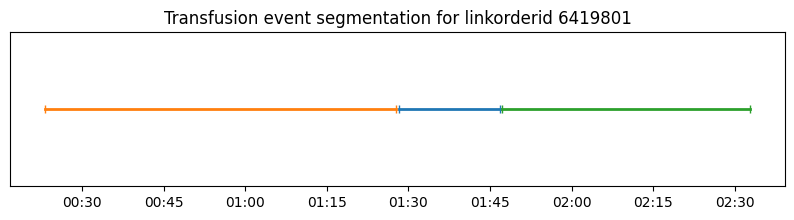

In [78]:
from datetime import timedelta
from matplotlib.dates import DateFormatter
linkids = [7465413, 65058, 198917, 8589493, 6419801]
for idx, (starttimes, endtimes) in enumerate(timepairsbyid[linkids]):
    timesegments = list(zip(starttimes.tolist(),endtimes.tolist()))
    plt.figure(figsize=(10,2))
    y=1
    for start, end in timesegments:
        plt.plot([start+timedelta(minutes=0.25), end-timedelta(minutes=0.25)], [y, y], marker="|", linewidth=2)
    
    plt.title(f"Transfusion event segmentation for linkorderid {linkids[idx]}")
    plt.tick_params(labelleft=False, left=False)

    myFmt = DateFormatter("%H:%M")
    plt.gca().xaxis.set_major_formatter(myFmt)


In [155]:
with open(f"{query_path}/merged_transfusions_mv.sql", 'r') as file:
    merged_transfusions_query = file.read()

merged_transfusions = client.query(merged_transfusions_query).to_dataframe()
merged_transfusions

/home/kmorhun/.pyenv/versions/transfusion/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,subject_id,hadm_id,icustay_id,starttime,endtime,num_segments,duration_minutes,amount,amountuom,itemid,label,linkorderid
0,22914,132096,266807,2139-03-17 08:00:00,2139-03-17 09:03:00,2,63,290.000010,ml,220970,Fresh Frozen Plasma,6760876
1,77013,141363,262256,2191-04-11 11:43:00,2191-04-11 12:13:00,2,30,301.000007,ml,220970,Fresh Frozen Plasma,6971691
2,67938,179620,219955,2130-03-30 06:49:00,2130-03-30 07:49:00,1,60,271.999998,ml,220970,Fresh Frozen Plasma,457069
3,46935,156099,270704,2197-03-04 13:57:00,2197-03-04 14:57:00,1,60,273.000012,ml,220970,Fresh Frozen Plasma,6538589
4,53492,124194,219919,2119-08-04 21:30:00,2119-08-04 21:45:00,1,15,276.000000,ml,220970,Fresh Frozen Plasma,6756798
...,...,...,...,...,...,...,...,...,...,...,...,...
32813,57139,155470,276227,2185-12-26 21:30:00,2185-12-27 00:00:00,1,150,375.000000,ml,225168,Packed Red Blood Cells,8550523
32814,55703,135869,240985,2165-04-13 09:20:00,2165-04-13 11:10:00,1,110,275.000000,ml,225168,Packed Red Blood Cells,2923351
32815,60805,143452,212587,2140-08-20 14:10:00,2140-08-20 15:10:00,1,60,150.000000,ml,225171,Cryoprecipitate,1183676
32816,85699,192742,295808,2153-03-26 06:44:00,2153-03-26 07:44:00,1,60,150.000000,ml,225171,Cryoprecipitate,496198


In [156]:
merged_transfusions[merged_transfusions.linkorderid == 7465413]

,subject_id,hadm_id,icustay_id,starttime,endtime,num_segments,duration_minutes,amount,amountuom,itemid,label,linkorderid
5923,87275,117310,249863,2107-05-24 09:30:00,2107-05-24 12:41:00,5,191,349.999997,ml,225168,Packed Red Blood Cells,7465413


In [157]:
merged_transfusions[merged_transfusions.duration_minutes > 500].num_segments.value_counts()

num_segments
1    24
Name: count, dtype: Int64

In [158]:
# sanity check! Is there only one entry per linkorderid? yes!
merged_transfusions.linkorderid.value_counts()

linkorderid
4070865    1
6760876    1
8253728    1
9748696    1
4419094    1
          ..
2404081    1
8343042    1
6756798    1
6538589    1
457069     1
Name: count, Length: 32818, dtype: Int64

In [159]:
merged_transfusions[merged_transfusions.duration_minutes > 500].linkorderid.value_counts()

linkorderid
3663826    1
7111744    1
5802682    1
9852324    1
7405505    1
5757691    1
9254688    1
1630088    1
8171928    1
4483556    1
4104656    1
4076110    1
609246     1
8378227    1
1871162    1
3939717    1
4218534    1
8633078    1
6935524    1
3457617    1
4970823    1
6186389    1
9551606    1
2459252    1
Name: count, dtype: Int64

Text(0, 0.5, 'Count')

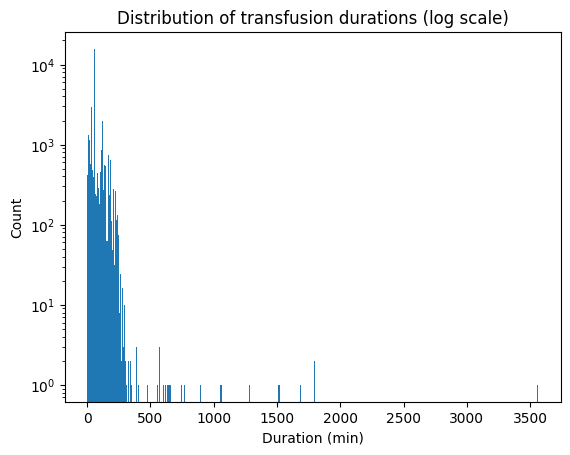

In [160]:
plt.hist(merged_transfusions.duration_minutes, bins=500, log=True)
plt.title("Distribution of transfusion durations (log scale)")
plt.xlabel("Duration (min)")
plt.ylabel("Count")
# plt.xlim(right=1000)

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f7f141e51c0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f7f157d51f0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f7f19db4cb0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f7f0ffaeb70>}

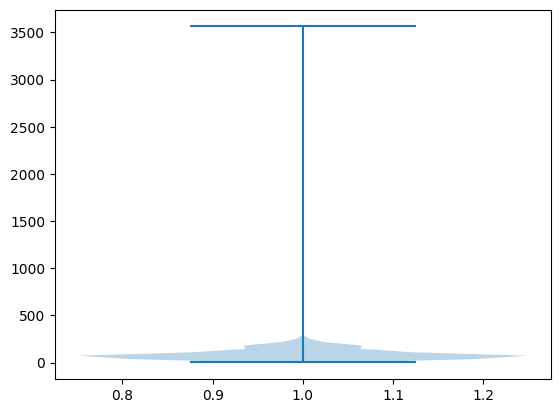

In [161]:
plt.violinplot(merged_transfusions.duration_minutes)

In [164]:
merged_transfusions.amount.value_counts()

amount
350.000010    4261
375.000000    2859
350.000004    1088
350.000000    1077
349.999986     874
              ... 
350.000004       1
299.000007       1
64.000000        1
124.999995       1
278.333322       1
Name: count, Length: 2818, dtype: int64

/tmp/ipykernel_1940/255258392.py:4: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(merged_transfusions.duration_minutes, merged_transfusions.amount, c=(0.1, 0.2, 0.5, 0.05))


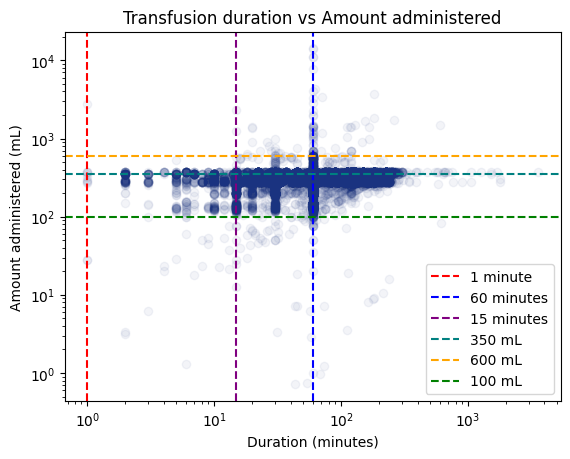

In [186]:
# are durations properly correlated with amounts?
fig = plt.figure()
ax = plt.gca()
ax.scatter(merged_transfusions.duration_minutes, merged_transfusions.amount, c=(0.1, 0.2, 0.5, 0.05))
plt.axvline(x=1, color='red', linestyle='--', label='1 minute')
# plt.axvline(x=30, color='green', linestyle='--', label='30 minutes')
plt.axvline(x=60, color='blue', linestyle='--', label='60 minutes')
plt.axvline(x=15, color='purple', linestyle='--', label='15 minutes')
plt.axhline(y=350, color='teal', linestyle='--', label='350 mL')
plt.axhline(y=600, color='orange', linestyle='--', label='600 mL')
plt.axhline(y=100, color='green', linestyle='--', label='100 mL')
ax.set_title('Transfusion duration vs Amount administered')
ax.set_xlabel('Duration (minutes)')
ax.set_ylabel('Amount administered (mL)')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
plt.show()

In [181]:
PRBC = merged_transfusions[merged_transfusions.itemid == 225168]
platelets = merged_transfusions[merged_transfusi ns.itemid == 225170]
cryoprecipitate = merged_transfusions[merged_transfusions.itemid == 225171]
FFP = merged_transfusions[merged_transfusions.itemid == 220970]
plasma_pheresis = merged_transfusions[merged_transfusions.itemid == 227532]

items = {"PRBC": PRBC, "Platelets": platelets, "Cryoprecipitate": cryoprecipitate, "FFP": FFP, "Plasma Pheresis": plasma_pheresis}

In [178]:
print("hello world")

hello world


/tmp/ipykernel_1940/3964175940.py:4: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(item.duration_minutes, item.amount, c=(0.1, 0.2, 0.5, 0.05))


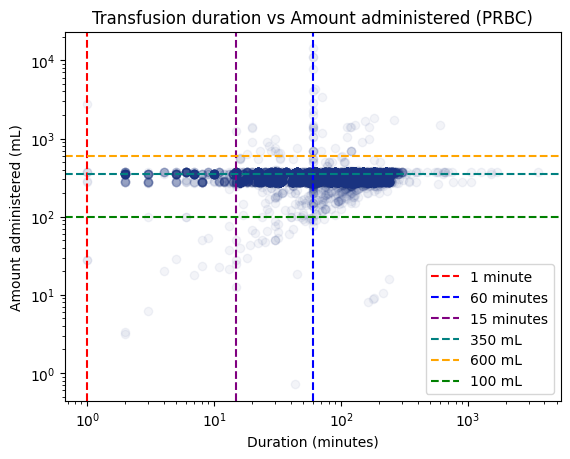

/tmp/ipykernel_1940/3964175940.py:4: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(item.duration_minutes, item.amount, c=(0.1, 0.2, 0.5, 0.05))


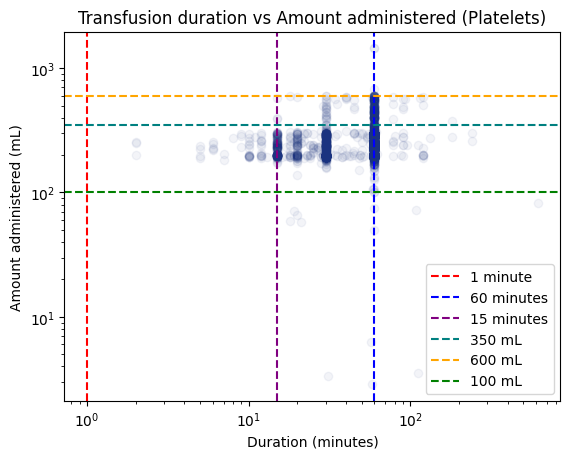

/tmp/ipykernel_1940/3964175940.py:4: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(item.duration_minutes, item.amount, c=(0.1, 0.2, 0.5, 0.05))


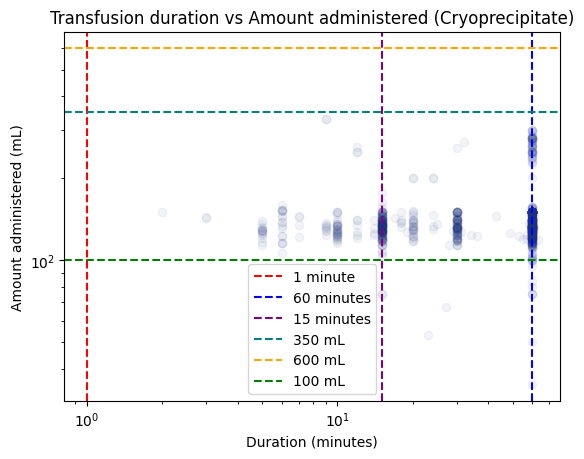

/tmp/ipykernel_1940/3964175940.py:4: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(item.duration_minutes, item.amount, c=(0.1, 0.2, 0.5, 0.05))


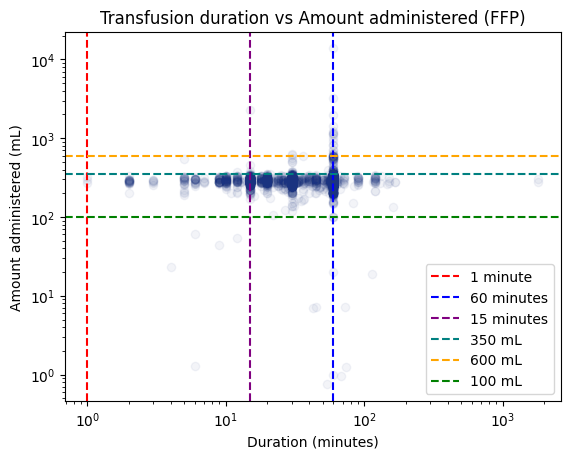

/tmp/ipykernel_1940/3964175940.py:4: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(item.duration_minutes, item.amount, c=(0.1, 0.2, 0.5, 0.05))


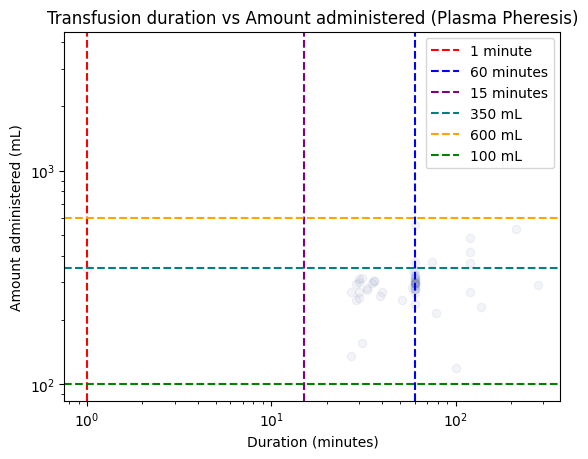

In [187]:
for label, item in items.items():
    fig = plt.figure()
    ax = plt.gca()
    ax.scatter(item.duration_minutes, item.amount, c=(0.1, 0.2, 0.5, 0.05))
    plt.axvline(x=1, color='red', linestyle='--', label='1 minute')
    # plt.axvline(x=30, color='green', linestyle='--', label='30 minutes')
    plt.axvline(x=60, color='blue', linestyle='--', label='60 minutes')
    plt.axvline(x=15, color='purple', linestyle='--', label='15 minutes')
    plt.axhline(y=350, color='teal', linestyle='--', label='350 mL')
    plt.axhline(y=600, color='orange', linestyle='--', label='600 mL')
    plt.axhline(y=100, color='green', linestyle='--', label='100 mL')
    ax.set_title(f'Transfusion duration vs Amount administered ({label})')
    ax.set_xlabel('Duration (minutes)')
    ax.set_ylabel('Amount administered (mL)')
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.legend()
    plt.show()